In [1]:
import geopandas as gpd

In [2]:
pops = gpd.read_file("PJT001_h_100m_cell_pop.geojson")

In [3]:
dongs = gpd.read_file("PJT001_tl_scco_emd.geojson")

In [5]:
dongs.intersection(pops)

0        GEOMETRYCOLLECTION EMPTY
1        GEOMETRYCOLLECTION EMPTY
2        GEOMETRYCOLLECTION EMPTY
3        GEOMETRYCOLLECTION EMPTY
4        GEOMETRYCOLLECTION EMPTY
                   ...           
10642                        None
10643                        None
10644                        None
10645                        None
10646                        None
Length: 10647, dtype: geometry

In [11]:
pops['geometry'][0].isin(dongs['geometry'][0])

AttributeError: 'Polygon' object has no attribute 'isin'

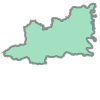

In [10]:
dongs['geometry'][0]

In [12]:
pops = gpd.read_file("화성시 읍면동 인구.geojson")

In [13]:
pops.head()

,id,pop_mn_0_9,pop_mn_10_,pop_mn_20_,pop_mn_30_,pop_mn_40_,pop_mn_50_,pop_mn_60_,pop_mn_70_,pop_mn_80_,...,pop_wmn_80,pop_wmn_90,pop_wmn_tt,pop_ttl,emd_cd,id_2,emd_cd_2,emd_eng_nm,emd_kor_nm,geometry
0,1,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,4.0,7.0,None,2112,41590256,Ujeong-eup,우정읍,"MULTIPOLYGON (((126.74685 37.03640, 126.74797 ..."
1,2,0.0,0.0,1.0,0.0,1.0,3.0,0.0,1.0,0.0,...,0.0,0.0,4.0,10.0,None,2112,41590256,Ujeong-eup,우정읍,"MULTIPOLYGON (((126.74572 37.03730, 126.74684 ..."
2,4,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,6.0,12.0,None,2112,41590256,Ujeong-eup,우정읍,"MULTIPOLYGON (((126.74797 37.03730, 126.74909 ..."
3,16,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,3.0,5.0,None,2112,41590256,Ujeong-eup,우정읍,"MULTIPOLYGON (((126.74609 37.04271, 126.74682 ..."
4,18,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,5.0,8.0,None,2119,41590350,Seosin-myeon,서신면,"MULTIPOLYGON (((126.68357 37.11554, 126.68470 ..."


In [15]:
dongwise = pops.groupby('emd_kor_nm').sum()

In [18]:
dongwise.columns

Index(['id', 'pop_mn_0_9', 'pop_mn_10_', 'pop_mn_20_', 'pop_mn_30_',
       'pop_mn_40_', 'pop_mn_50_', 'pop_mn_60_', 'pop_mn_70_', 'pop_mn_80_',
       'pop_mn_90_', 'pop_mn_ttl', 'pop_wmn_0_', 'pop_wmn_10', 'pop_wmn_20',
       'pop_wmn_30', 'pop_wmn_40', 'pop_wmn_50', 'pop_wmn_60', 'pop_wmn_70',
       'pop_wmn_80', 'pop_wmn_90', 'pop_wmn_tt', 'pop_ttl', 'id_2'],
      dtype='object')

In [20]:
dongwise = dongwise.drop(['id', 'id_2'], axis=1)

In [21]:
dongwise.head()

,pop_mn_0_9,pop_mn_10_,pop_mn_20_,pop_mn_30_,pop_mn_40_,pop_mn_50_,pop_mn_60_,pop_mn_70_,pop_mn_80_,pop_mn_90_,...,pop_wmn_20,pop_wmn_30,pop_wmn_40,pop_wmn_50,pop_wmn_60,pop_wmn_70,pop_wmn_80,pop_wmn_90,pop_wmn_tt,pop_ttl
emd_kor_nm,,,,,,,,,,,,,,,,,,,,,
금곡동,26.0,40.0,74.0,54.0,70.0,113.0,68.0,36.0,15.0,0.0,...,46.0,35.0,56.0,80.0,46.0,46.0,26.0,2.0,393.0,890.0
기산동,1190.0,901.0,959.0,1965.0,1507.0,853.0,472.0,182.0,37.0,0.0,...,936.0,1739.0,1376.0,872.0,482.0,191.0,89.0,0.0,7807.0,15876.0
기안동,865.0,1076.0,768.0,921.0,1453.0,1000.0,506.0,240.0,76.0,1.0,...,725.0,1007.0,1379.0,912.0,527.0,289.0,126.0,1.0,6695.0,13604.0
남양읍,1999.0,1737.0,2638.0,3639.0,3223.0,2896.0,1649.0,688.0,282.0,0.0,...,1951.0,2759.0,2534.0,2509.0,1535.0,823.0,466.0,3.0,16145.0,34912.0
능동,4497.0,3697.0,3540.0,6294.0,5741.0,2837.0,1265.0,667.0,181.0,0.0,...,3363.0,6109.0,5390.0,2716.0,1650.0,897.0,379.0,1.0,28316.0,57059.0


In [23]:
dongwise['pop_ttl'].sum()

769086.0

In [30]:
pops['geometry'].apply(lambda x : x.area)[0]

8.723604229705003e-07

In [32]:
dongwise.index.shape

(37,)

In [33]:
dongwise.index

Index(['금곡동', '기산동', '기안동', '남양읍', '능동', '마도면', '매송면', '목동', '반송동', '반월동',
       '반정동', '방교동', '배양동', '병점동', '봉담읍', '비봉면', '산척동', '서신면', '석우동', '송동',
       '송산동', '송산면', '신동', '안녕동', '양감면', '영천동', '오산동', '우정읍', '장안면', '장지동',
       '정남면', '중동', '진안동', '청계동', '팔탄면', '향남읍', '황계동'],
      dtype='object', name='emd_kor_nm')

In [37]:
areadata = gpd.read_file("읍면동 면적용.geojson")

In [38]:
areadata.head()

,id,emd_cd,emd_eng_nm,emd_kor_nm,geometry
0,2122,41590400,Yanggam-myeon,양감면,"MULTIPOLYGON (((955513.040 1902823.825, 955500..."
1,2123,41590410,Jeongnam-myeon,정남면,"MULTIPOLYGON (((956145.144 1909895.775, 956148..."
2,2087,41590116,Jinan-dong,진안동,"MULTIPOLYGON (((958737.283 1914355.213, 958741..."
3,2088,41590117,Byeongjeom-dong,병점동,"MULTIPOLYGON (((958012.130 1911386.049, 958007..."
4,2089,41590118,Neung-dong,능동,"MULTIPOLYGON (((960906.208 1911317.755, 960906..."


In [40]:
areadata['area'] = areadata['geometry'].apply(lambda x : x.area)

In [41]:
areadata

,id,emd_cd,emd_eng_nm,emd_kor_nm,geometry,area
0,2122,41590400,Yanggam-myeon,양감면,"MULTIPOLYGON (((955513.040 1902823.825, 955500...",3.102512e+07
1,2123,41590410,Jeongnam-myeon,정남면,"MULTIPOLYGON (((956145.144 1909895.775, 956148...",4.061242e+07
2,2087,41590116,Jinan-dong,진안동,"MULTIPOLYGON (((958737.283 1914355.213, 958741...",2.778541e+06
3,2088,41590117,Byeongjeom-dong,병점동,"MULTIPOLYGON (((958012.130 1911386.049, 958007...",2.446596e+06
4,2089,41590118,Neung-dong,능동,"MULTIPOLYGON (((960906.208 1911317.755, 960906...",2.705325e+06
5,2090,41590119,Gisan-dong,기산동,"MULTIPOLYGON (((960334.999 1912890.912, 960320...",1.342744e+06
6,2091,41590120,Banwol-dong,반월동,"MULTIPOLYGON (((961547.624 1915779.593, 961550...",3.967356e+06
7,2092,41590121,Banjeong-dong,반정동,"MULTIPOLYGON (((959428.104 1916559.092, 959436...",2.086314e+06
8,2093,41590122,Hwanggye-dong,황계동,"MULTIPOLYGON (((957729.559 1914163.730, 957956...",1.934861e+06
9,2094,41590123,Baeyang-dong,배양동,"MULTIPOLYGON (((955081.986 1914761.683, 955087...",1.803162e+06


In [44]:
(areadata['area']/1000000).sum()

689.0547552103133

In [45]:
dongwise.head()

,pop_mn_0_9,pop_mn_10_,pop_mn_20_,pop_mn_30_,pop_mn_40_,pop_mn_50_,pop_mn_60_,pop_mn_70_,pop_mn_80_,pop_mn_90_,...,pop_wmn_20,pop_wmn_30,pop_wmn_40,pop_wmn_50,pop_wmn_60,pop_wmn_70,pop_wmn_80,pop_wmn_90,pop_wmn_tt,pop_ttl
emd_kor_nm,,,,,,,,,,,,,,,,,,,,,
금곡동,26.0,40.0,74.0,54.0,70.0,113.0,68.0,36.0,15.0,0.0,...,46.0,35.0,56.0,80.0,46.0,46.0,26.0,2.0,393.0,890.0
기산동,1190.0,901.0,959.0,1965.0,1507.0,853.0,472.0,182.0,37.0,0.0,...,936.0,1739.0,1376.0,872.0,482.0,191.0,89.0,0.0,7807.0,15876.0
기안동,865.0,1076.0,768.0,921.0,1453.0,1000.0,506.0,240.0,76.0,1.0,...,725.0,1007.0,1379.0,912.0,527.0,289.0,126.0,1.0,6695.0,13604.0
남양읍,1999.0,1737.0,2638.0,3639.0,3223.0,2896.0,1649.0,688.0,282.0,0.0,...,1951.0,2759.0,2534.0,2509.0,1535.0,823.0,466.0,3.0,16145.0,34912.0
능동,4497.0,3697.0,3540.0,6294.0,5741.0,2837.0,1265.0,667.0,181.0,0.0,...,3363.0,6109.0,5390.0,2716.0,1650.0,897.0,379.0,1.0,28316.0,57059.0


In [47]:
dongwise = dongwise.merge(areadata, on='emd_kor_nm')

In [48]:
dongwise['area'] = dongwise['area']/1000000

In [49]:
dongwise.head()

,emd_kor_nm,pop_mn_0_9,pop_mn_10_,pop_mn_20_,pop_mn_30_,pop_mn_40_,pop_mn_50_,pop_mn_60_,pop_mn_70_,pop_mn_80_,...,pop_wmn_70,pop_wmn_80,pop_wmn_90,pop_wmn_tt,pop_ttl,id,emd_cd,emd_eng_nm,geometry,area
0,금곡동,26.0,40.0,74.0,54.0,70.0,113.0,68.0,36.0,15.0,...,46.0,26.0,2.0,393.0,890.0,2110,41590139,Geumgok-dong,"MULTIPOLYGON (((961937.832 1909559.093, 961994...",2.195447
1,기산동,1190.0,901.0,959.0,1965.0,1507.0,853.0,472.0,182.0,37.0,...,191.0,89.0,0.0,7807.0,15876.0,2090,41590119,Gisan-dong,"MULTIPOLYGON (((960334.999 1912890.912, 960320...",1.342744
2,기안동,865.0,1076.0,768.0,921.0,1453.0,1000.0,506.0,240.0,76.0,...,289.0,126.0,1.0,6695.0,13604.0,2095,41590124,Gian-dong,"MULTIPOLYGON (((954022.150 1912832.334, 954014...",2.423266
3,남양읍,1999.0,1737.0,2638.0,3639.0,3223.0,2896.0,1649.0,688.0,282.0,...,823.0,466.0,3.0,16145.0,34912.0,2114,41590262,Namyang-eup,"MULTIPOLYGON (((937682.759 1908186.189, 937660...",67.035144
4,능동,4497.0,3697.0,3540.0,6294.0,5741.0,2837.0,1265.0,667.0,181.0,...,897.0,379.0,1.0,28316.0,57059.0,2089,41590118,Neung-dong,"MULTIPOLYGON (((960906.208 1911317.755, 960906...",2.705325


In [50]:
dongwise['density'] = dongwise['pop_ttl']/dongwise['area']

In [51]:
dongwise['density']

0       405.384387
1     11823.552322
2      5613.910063
3       520.801444
4     21091.368721
5       179.174438
6       324.435169
7      8725.659169
8     19954.915939
9     10356.014698
10      561.756295
11      541.250936
12      388.761525
13    24441.713450
14     1774.225670
15      138.306209
16     4798.976372
17      129.088562
18     5635.516667
19     5358.232314
20     3936.469648
21      183.411501
22        8.298569
23     2563.765410
24      111.135750
25     5749.796127
26     3391.414594
27      284.333462
28      145.766352
29      971.356283
30      257.975298
31       36.926040
32     8600.915689
33    13048.853761
34      173.187377
35     1600.806682
36      314.751321
Name: density, dtype: float64

In [52]:
dongwise.head()

,emd_kor_nm,pop_mn_0_9,pop_mn_10_,pop_mn_20_,pop_mn_30_,pop_mn_40_,pop_mn_50_,pop_mn_60_,pop_mn_70_,pop_mn_80_,...,pop_wmn_80,pop_wmn_90,pop_wmn_tt,pop_ttl,id,emd_cd,emd_eng_nm,geometry,area,density
0,금곡동,26.0,40.0,74.0,54.0,70.0,113.0,68.0,36.0,15.0,...,26.0,2.0,393.0,890.0,2110,41590139,Geumgok-dong,"MULTIPOLYGON (((961937.832 1909559.093, 961994...",2.195447,405.384387
1,기산동,1190.0,901.0,959.0,1965.0,1507.0,853.0,472.0,182.0,37.0,...,89.0,0.0,7807.0,15876.0,2090,41590119,Gisan-dong,"MULTIPOLYGON (((960334.999 1912890.912, 960320...",1.342744,11823.552322
2,기안동,865.0,1076.0,768.0,921.0,1453.0,1000.0,506.0,240.0,76.0,...,126.0,1.0,6695.0,13604.0,2095,41590124,Gian-dong,"MULTIPOLYGON (((954022.150 1912832.334, 954014...",2.423266,5613.910063
3,남양읍,1999.0,1737.0,2638.0,3639.0,3223.0,2896.0,1649.0,688.0,282.0,...,466.0,3.0,16145.0,34912.0,2114,41590262,Namyang-eup,"MULTIPOLYGON (((937682.759 1908186.189, 937660...",67.035144,520.801444
4,능동,4497.0,3697.0,3540.0,6294.0,5741.0,2837.0,1265.0,667.0,181.0,...,379.0,1.0,28316.0,57059.0,2089,41590118,Neung-dong,"MULTIPOLYGON (((960906.208 1911317.755, 960906...",2.705325,21091.368721


In [58]:
dongRes = dongwise[['emd_kor_nm', 'density', 'pop_ttl', 'area', 'geometry']]

In [70]:
gpd.GeoDataFrame(dongRes).to_file("행정동별 인구데이터.shp", encoding='utf-8')

In [69]:
dongRes = gpd.GeoDataFrame(dongRes)

In [71]:
dongRes.to_file("행정동별 인구데이터.shp", encoding='utf-8')

In [72]:
dongRes['pop_ttl'].sum()

769086.0

In [73]:
dongRes['area'].sum()

689.0547552103134

In [74]:
dongRes['pop_ttl'].sum()/dongRes['area'].sum()

1116.1464225949062

In [76]:
dongRes.sort_values('density')

,emd_kor_nm,density,pop_ttl,area,geometry
22,신동,8.298569,67.0,8.073681,"MULTIPOLYGON (((969142.006 1911124.678, 969144..."
31,중동,36.926040,218.0,5.903693,"MULTIPOLYGON (((969025.009 1913502.752, 969036..."
24,양감면,111.135750,3448.0,31.025120,"MULTIPOLYGON (((955513.040 1902823.825, 955500..."
17,서신면,129.088562,5592.0,43.319097,"MULTIPOLYGON (((922122.069 1909291.063, 922152..."
15,비봉면,138.306209,5311.0,38.400301,"MULTIPOLYGON (((940859.315 1914844.534, 940808..."
28,장안면,145.766352,9842.0,67.519012,"MULTIPOLYGON (((938850.023 1890765.688, 938851..."
34,팔탄면,173.187377,8813.0,50.887081,"MULTIPOLYGON (((940551.931 1905942.711, 940601..."
5,마도면,179.174438,5697.0,31.795830,"MULTIPOLYGON (((937508.060 1910449.202, 937528..."
21,송산면,183.411501,9888.0,53.911559,"MULTIPOLYGON (((926401.388 1919791.424, 926366..."
30,정남면,257.975298,10477.0,40.612416,"MULTIPOLYGON (((956145.144 1909895.775, 956148..."


In [77]:
floating = gpd.read_file('PJT001_h_100m_cell_flow.geojson')

In [78]:
floating.head()

,id,ymd,t00_01,t01_02,t02_03,t03_04,t04_05,t05_06,t06_07,t07_08,...,t16_17,t17_18,t18_19,t19_20,t20_21,t21_22,t22_23,t23_24,emd_cd,geometry
0,3573,20180701,0.07,0.35,0.07,NaN,NaN,0.14,0.07,0.42,...,0.42,0.21,0.21,0.14,0.14,0.28,0.14,0.21,41590370,"POLYGON ((126.86813 37.09967, 126.86925 37.099..."
1,3574,20180701,0.01,NaN,NaN,NaN,0.01,0.01,0.01,0.03,...,0.03,0.04,0.03,0.02,0.02,0.01,0.02,0.01,41590370,"POLYGON ((126.87150 37.09877, 126.87263 37.098..."
2,3575,20180701,0.01,NaN,NaN,NaN,0.01,0.01,0.01,0.03,...,0.03,0.04,0.03,0.02,0.02,0.01,0.02,0.01,41590370,"POLYGON ((126.87150 37.09968, 126.87263 37.099..."
3,3576,20180701,0.01,0.02,0.01,NaN,NaN,0.03,0.09,0.17,...,0.16,0.14,0.14,0.07,0.06,0.05,0.01,0.02,41590370,"POLYGON ((126.86925 37.10057, 126.87037 37.100..."
4,3577,20180701,NaN,NaN,0.01,NaN,NaN,NaN,0.01,0.01,...,0.01,0.02,0.02,0.01,0.01,NaN,NaN,NaN,41590370,"POLYGON ((126.87150 37.10148, 126.87262 37.101..."


In [80]:
from collections import Counter

In [81]:
Counter(floating['ymd'])

Counter({'20180701': 30844,
         '20180702': 35208,
         '20180703': 35116,
         '20180704': 35403})

In [87]:
strred = floating['geometry'].astype(str)

In [96]:
import pandas as pd

In [99]:
uniqueShapes = pd.DataFrame(Counter(strred).most_common())

In [98]:
floating.shape

(136571, 28)

In [100]:
uniqueShapes.columns

RangeIndex(start=0, stop=2, step=1)

In [103]:
uniqueShapes[uniqueShapes[1]<4]

,0,1
30609,"POLYGON ((126.8602367725263 37.10777238677031,...",3
30610,"POLYGON ((126.8568514934751 37.11317473703017,...",3
30611,"POLYGON ((126.8557212503736 37.11587655960709,...",3
30612,"POLYGON ((126.908633883258 37.09069928335791, ...",3
30613,"POLYGON ((126.681092950097 37.17049991958849, ...",3
...,...,...
35636,"POLYGON ((126.7816215974054 37.05989706565816,...",1
35637,"POLYGON ((126.8198635364979 37.05365379196853,...",1
35638,"POLYGON ((126.8029324623423 37.0797579282055, ...",1
35639,"POLYGON ((126.8546270982067 37.09965604962021,...",1


In [109]:
july4 = floating[floating['ymd']=='20180704']

In [112]:
july4 = pd.DataFrame(july4)

In [116]:
type(july4)

pandas.core.frame.DataFrame

In [117]:
pd.DataFrame

pandas.core.frame.DataFrame

In [120]:
geo = july4['geometry']

In [121]:
july4 = july4.drop('geometry', axis=1)

In [123]:
july4 = july4.fillna(0)

In [124]:
july4.head()

,id,ymd,t00_01,t01_02,t02_03,t03_04,t04_05,t05_06,t06_07,t07_08,...,t15_16,t16_17,t17_18,t18_19,t19_20,t20_21,t21_22,t22_23,t23_24,emd_cd
55019,116634,20180704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,41590262
55204,120208,20180704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01,0.01,0.00,0.00,0.0,0.0,0.0,0.0,0.0,41590360
57259,104545,20180704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01,0.00,0.01,0.01,0.0,0.0,0.0,0.0,0.0,41590370
57537,106069,20180704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01,0.01,0.00,0.00,0.0,0.0,0.0,0.0,0.0,41590360
57604,106070,20180704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,41590360


In [125]:
july4.columns

Index(['id', 'ymd', 't00_01', 't01_02', 't02_03', 't03_04', 't04_05', 't05_06',
       't06_07', 't07_08', 't08_09', 't09_10', 't10_11', 't11_12', 't12_13',
       't13_14', 't14_15', 't15_16', 't16_17', 't17_18', 't18_19', 't19_20',
       't20_21', 't21_22', 't22_23', 't23_24', 'emd_cd'],
      dtype='object')

In [127]:
july4[['t00_01', 't01_02', 't02_03', 't03_04', 't04_05', 't05_06']].sum(axis=1)

55019     0.00
55204     0.00
57259     0.00
57537     0.00
57604     0.00
          ... 
133412    0.18
133413    0.14
133414    0.00
133415    0.98
133416    1.52
Length: 35403, dtype: float64

In [130]:
july4Res = july4[['emd_cd']]

In [132]:
july4Res['00-06'] = july4[['t00_01', 't01_02', 't02_03', 't03_04', 't04_05', 't05_06']].sum(axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [135]:
july4Res['06-12'] = july4[['t06_07', 't07_08', 't08_09', 't09_10', 't10_11', 't11_12']].sum(axis=1)
july4Res['12-18'] = july4[['t12_13', 't13_14', 't14_15', 't15_16', 't16_17', 't17_18']].sum(axis=1)
july4Res['18-24'] = july4[['t18_19', 't19_20', 't20_21', 't21_22', 't22_23', 't23_24']].sum(axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [137]:
july4Res['total'] = july4Res[['00-06', '06-12', '12-18', '18-24']].sum(axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [138]:
july4Res.head()

,emd_cd,00-06,06-12,12-18,18-24,total
55019,41590262,0.0,0.02,0.01,0.00,0.03
55204,41590360,0.0,0.00,0.05,0.00,0.05
57259,41590370,0.0,0.01,0.04,0.01,0.06
57537,41590360,0.0,0.02,0.05,0.00,0.07
57604,41590360,0.0,0.00,0.01,0.00,0.01


In [139]:
july4Res['geometry'] = floating[floating['ymd']=='20180704']['geometry']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [140]:
july4Res =gpd.GeoDataFrame(july4Res)

In [141]:
july4Res.to_file("7월 4일 유동인구.shp")

In [142]:
move = pd.read_csv("PJT001_sk_emd_od.csv")

In [143]:
move.head()

,std_ymd,tm_trm,org,dst,pop
0,20180703,00_05,기배동,남양읍,11.04
1,20180703,00_05,기배동,동탄1동,13.80
2,20180703,00_05,기배동,동탄2동,24.84
3,20180703,00_05,기배동,동탄3동,8.28
4,20180703,00_05,기배동,동탄4동,2.76


In [166]:
sliced = move[move['std_ymd']==20180704]

In [167]:
sliced.shape

(2271, 5)

In [168]:
simplified = sliced.groupby(['org', 'dst']).sum()

simplified['origin'] = simplified.index.get_level_values(0)

simplified['dest'] = simplified.index.get_level_values(1)

simplified

std_ymd      pop origin  dest
org dst                                 
기배동 남양읍   80722816   455.29    기배동   남양읍
    동탄1동  80722816   207.00    기배동  동탄1동
    동탄2동  80722816   482.94    기배동  동탄2동
    동탄3동  60542112   187.68    기배동  동탄3동
    동탄4동  60542112    44.16    기배동  동탄4동
...            ...      ...    ...   ...
화산동 장안면   80722816   295.26    화산동   장안면
    정남면   80722816  4580.11    화산동   정남면
    진안동   80722816  4701.53    화산동   진안동
    팔탄면   80722816   954.71    화산동   팔탄면
    향남읍   80722816  1531.38    화산동   향남읍

[597 rows x 4 columns]

In [169]:
pos = pd.read_csv("gis/화성시 행정동 위치.csv", index_col=0)

In [170]:
inAndOut = sliced.groupby('org').sum()

In [171]:
out = sliced.groupby('dst').sum()

In [172]:
inAndOut = inAndOut.join(out, how='outer', rsuffix='r')

In [173]:
inAndOut = inAndOut.drop(['std_ymd', 'std_ymdr'], axis=1)

In [175]:
inAndOut.columns = ['out', 'in']

In [176]:
inAndOut

,out,in
org,,
기배동,21078.05,14234.97
남양읍,37138.69,36699.71
동탄1동,32475.26,68765.56
동탄2동,115601.30,99087.74
동탄3동,95167.35,65126.24
동탄4동,79076.40,35411.07
동탄5동,44342.16,49214.67
동탄6동,67584.82,64411.71
마도면,12549.15,19132.63


In [178]:
simplified

std_ymd      pop origin  dest
org dst                                 
기배동 남양읍   80722816   455.29    기배동   남양읍
    동탄1동  80722816   207.00    기배동  동탄1동
    동탄2동  80722816   482.94    기배동  동탄2동
    동탄3동  60542112   187.68    기배동  동탄3동
    동탄4동  60542112    44.16    기배동  동탄4동
...            ...      ...    ...   ...
화산동 장안면   80722816   295.26    화산동   장안면
    정남면   80722816  4580.11    화산동   정남면
    진안동   80722816  4701.53    화산동   진안동
    팔탄면   80722816   954.71    화산동   팔탄면
    향남읍   80722816  1531.38    화산동   향남읍

[597 rows x 4 columns]

In [179]:
from shapely.geometry import LineString

In [180]:
simplified.to_excel("행정동별 이동_180704.xlsx")

In [182]:
simplified = simplified.drop('std_ymd', axis=1)

In [183]:
simplified.index = range(simplified.shape[0])

In [185]:
pos.head()

,동명,x,y,주소
0,기배동,126.984680,37.224399,경기 화성시 기배동
1,남양읍,126.823776,37.211787,경기 화성시 남양읍
2,동탄1동,127.071916,37.206523,경기 화성시 동탄1동
3,동탄2동,127.072393,37.196856,경기 화성시 동탄2동
4,동탄3동,127.058896,37.209875,경기 화성시 동탄3동


In [187]:
added1 = simplified.merge(pos, left_on='origin', right_on='동명')

In [188]:
added1.head()

,pop,origin,dest,동명,x,y,주소
0,455.29,기배동,남양읍,기배동,126.98468,37.224399,경기 화성시 기배동
1,207.00,기배동,동탄1동,기배동,126.98468,37.224399,경기 화성시 기배동
2,482.94,기배동,동탄2동,기배동,126.98468,37.224399,경기 화성시 기배동
3,187.68,기배동,동탄3동,기배동,126.98468,37.224399,경기 화성시 기배동
4,44.16,기배동,동탄4동,기배동,126.98468,37.224399,경기 화성시 기배동


In [189]:
added1.drop(['동명', '주소'], axis=1, inplace=True)

In [190]:
added1.head()

,pop,origin,dest,x,y
0,455.29,기배동,남양읍,126.98468,37.224399
1,207.00,기배동,동탄1동,126.98468,37.224399
2,482.94,기배동,동탄2동,126.98468,37.224399
3,187.68,기배동,동탄3동,126.98468,37.224399
4,44.16,기배동,동탄4동,126.98468,37.224399


In [191]:
added1.columns = ['pop', 'org', 'dst', 'x1', 'y1']

In [194]:
added2 = added1.merge(pos, left_on='dst', right_on='동명')

In [195]:
added2.head()

,pop,org,dst,x1,y1,동명,x,y,주소
0,455.29,기배동,남양읍,126.984680,37.224399,남양읍,126.823776,37.211787,경기 화성시 남양읍
1,229.02,동탄1동,남양읍,127.071916,37.206523,남양읍,126.823776,37.211787,경기 화성시 남양읍
2,1716.18,동탄2동,남양읍,127.072393,37.196856,남양읍,126.823776,37.211787,경기 화성시 남양읍
3,1123.00,동탄3동,남양읍,127.058896,37.209875,남양읍,126.823776,37.211787,경기 화성시 남양읍
4,1197.49,동탄4동,남양읍,127.112307,37.199730,남양읍,126.823776,37.211787,경기 화성시 남양읍


In [196]:
added2.drop(['동명', '주소'], axis=1, inplace=True)

In [197]:
added2.head()

,pop,org,dst,x1,y1,x,y
0,455.29,기배동,남양읍,126.984680,37.224399,126.823776,37.211787
1,229.02,동탄1동,남양읍,127.071916,37.206523,126.823776,37.211787
2,1716.18,동탄2동,남양읍,127.072393,37.196856,126.823776,37.211787
3,1123.00,동탄3동,남양읍,127.058896,37.209875,126.823776,37.211787
4,1197.49,동탄4동,남양읍,127.112307,37.199730,126.823776,37.211787


In [198]:
added2.columns = ['pop', 'org', 'dst', 'x1', 'y1', 'x2', 'y2']

In [199]:
from shapely.geometry import LineString

In [201]:
starts = added2[['x1', 'y1']].values
ends = added2[['x2', 'y2']].values

In [203]:
starts

array([[126.98468046,  37.22439891],
       [127.0719159 ,  37.20652287],
       [127.07239331,  37.1968561 ],
       ...,
       [126.90485259,  37.16226474],
       [126.92035298,  37.13243668],
       [127.01481569,  37.20617615]])

In [204]:
new = []

In [205]:
for index, num in enumerate(added2['pop']) : 
    new.append([num, LineString([starts[index], ends[index]])])

In [206]:
new

[[455.28999999999996,
 [229.02, <shapely.geometry.linestring.LineString at 0x20d5ffc3b08>],
 [1716.18, <shapely.geometry.linestring.LineString at 0x20d5ffc4508>],
 [1123.0, <shapely.geometry.linestring.LineString at 0x20d5ffc40c8>],
 [1197.49, <shapely.geometry.linestring.LineString at 0x20d5ffc4108>],
 [493.90999999999997,
 [786.42, <shapely.geometry.linestring.LineString at 0x20d5ffc4608>],
 [5065.72, <shapely.geometry.linestring.LineString at 0x20d5ffc4688>],
 [1020.9200000000001,
 [380.78999999999996,
 [408.37, <shapely.geometry.linestring.LineString at 0x20d5ffc4908>],
 [350.45, <shapely.geometry.linestring.LineString at 0x20d5ffc4808>],
 [4053.09, <shapely.geometry.linestring.LineString at 0x20d5ffc4b88>],
 [4671.16, <shapely.geometry.linestring.LineString at 0x20d5ffc4dc8>],
 [1349.26, <shapely.geometry.linestring.LineString at 0x20d5ffc4e48>],
 [2828.09, <shapely.geometry.linestring.LineString at 0x20d5ffc4f08>],
 [149.03, <shapely.geometry.linestring.LineString at 0x20d600225c

In [207]:
import geopandas as gpd

In [208]:
frame = gpd.GeoDataFrame(new)
frame.columns = ['breadth', 'geometry']

In [209]:
frame

,breadth,geometry
0,455.29,"LINESTRING (126.98468 37.22440, 126.82378 37.2..."
1,229.02,"LINESTRING (127.07192 37.20652, 126.82378 37.2..."
2,1716.18,"LINESTRING (127.07239 37.19686, 126.82378 37.2..."
3,1123.00,"LINESTRING (127.05890 37.20987, 126.82378 37.2..."
4,1197.49,"LINESTRING (127.11231 37.19973, 126.82378 37.2..."
...,...,...
592,176.64,"LINESTRING (126.97134 37.15999, 126.98468 37.2..."
593,242.87,"LINESTRING (127.03496 37.21332, 126.98468 37.2..."
594,24.84,"LINESTRING (126.90485 37.16226, 126.98468 37.2..."
595,240.11,"LINESTRING (126.92035 37.13244, 126.98468 37.2..."


In [211]:
added2.head()

,pop,org,dst,x1,y1,x2,y2
0,455.29,기배동,남양읍,126.984680,37.224399,126.823776,37.211787
1,229.02,동탄1동,남양읍,127.071916,37.206523,126.823776,37.211787
2,1716.18,동탄2동,남양읍,127.072393,37.196856,126.823776,37.211787
3,1123.00,동탄3동,남양읍,127.058896,37.209875,126.823776,37.211787
4,1197.49,동탄4동,남양읍,127.112307,37.199730,126.823776,37.211787


In [212]:
frame[['org', 'dst']] = added2[['org', 'dst']]

In [214]:
frame.to_file("gis/행정동간 이동_180704.shp")

In [220]:
pos.head()

,동명,x,y,주소
0,기배동,126.984680,37.224399,경기 화성시 기배동
1,남양읍,126.823776,37.211787,경기 화성시 남양읍
2,동탄1동,127.071916,37.206523,경기 화성시 동탄1동
3,동탄2동,127.072393,37.196856,경기 화성시 동탄2동
4,동탄3동,127.058896,37.209875,경기 화성시 동탄3동


In [221]:
inAndOut.merge(pos, left_on='org', right_on='동명')

,out,in,동명,x,y,주소
0,21078.05,14234.97,기배동,126.984680,37.224399,경기 화성시 기배동
1,37138.69,36699.71,남양읍,126.823776,37.211787,경기 화성시 남양읍
2,32475.26,68765.56,동탄1동,127.071916,37.206523,경기 화성시 동탄1동
3,115601.30,99087.74,동탄2동,127.072393,37.196856,경기 화성시 동탄2동
4,95167.35,65126.24,동탄3동,127.058896,37.209875,경기 화성시 동탄3동
5,79076.40,35411.07,동탄4동,127.112307,37.199730,경기 화성시 동탄4동
6,44342.16,49214.67,동탄5동,127.103990,37.210157,경기 화성시 동탄5동
7,67584.82,64411.71,동탄6동,127.089612,37.173424,경기 화성시 동탄6동
8,12549.15,19132.63,마도면,126.769634,37.205474,경기 화성시 마도면
9,7831.31,5436.25,매송면,126.909117,37.252341,경기 화성시 매송면


In [222]:
inAndOut = inAndOut.merge(pos, left_on='org', right_on='동명')

In [223]:
inAndOut.drop(['주소'], axis=1, inplace=True)

In [226]:
inAndOut.columns = ['outs', 'ins', '동명', 'x', 'y']

In [227]:
inAndOut['sum'] = inAndOut['ins'] + inAndOut['outs']

In [228]:
inAndOut.to_csv("gis/행정동별 출입량.csv")

In [229]:
inAndOut.sort_values('sum')

,outs,ins,동명,x,y,sum
9,7831.31,5436.25,매송면,126.909117,37.252341,13267.56
15,6506.63,8915.46,서신면,126.708732,37.166573,15422.09
14,8907.24,14251.93,비봉면,126.873410,37.235177,23159.17
16,10576.34,12891.36,송산면,126.739185,37.217863,23467.70
17,5339.38,19982.40,양감면,126.944424,37.081306,25321.78
8,12549.15,19132.63,마도면,126.769634,37.205474,31681.78
0,21078.05,14234.97,기배동,126.984680,37.224399,35313.02
20,12185.49,38082.24,정남면,126.971337,37.159986,50267.73
19,17490.62,35063.44,장안면,126.831329,37.079764,52554.06
18,22482.06,33918.62,우정읍,126.815353,37.089822,56400.68


In [240]:
floating_updated = gpd.read_file("7월 4일 유동인구_지역겹침.shp", encoding='euc-kr')

In [241]:
floating_updated.head()

,emd_cd,00-06,06-12,12-18,18-24,total,emd_kor_nm,density,pop_ttl,area,geometry
0,41590262,0.0,0.02,0.01,0.00,0.03,남양읍,520.801444,34912.0,67.035144,"POLYGON ((126.83644 37.18613, 126.83757 37.186..."
1,41590360,0.0,0.00,0.05,0.00,0.05,팔탄면,173.187377,8813.0,50.887081,"POLYGON ((126.89502 37.17539, 126.89615 37.175..."
2,41590370,0.0,0.01,0.04,0.01,0.06,장안면,145.766352,9842.0,67.519012,"POLYGON ((126.85239 37.09064, 126.85352 37.090..."
3,41590360,0.0,0.02,0.05,0.00,0.07,팔탄면,173.187377,8813.0,50.887081,"POLYGON ((126.85684 37.11858, 126.85797 37.118..."
4,41590360,0.0,0.00,0.01,0.00,0.01,팔탄면,173.187377,8813.0,50.887081,"POLYGON ((126.85571 37.11948, 126.85684 37.119..."


In [242]:
floating_updated.drop(['geometry', 'density', 'pop_ttl', 'area'], axis=1, inplace=True)

In [245]:
dongwiseFloatings = floating_updated.groupby('emd_kor_nm').sum()

In [246]:
dongwiseFloatings.head()

,00-06,06-12,12-18,18-24,total
emd_kor_nm,,,,,
금곡동,894.19,5349.29,7627.57,3003.30,16874.35
기산동,1829.15,8396.69,11612.40,8784.62,30622.86
기안동,3380.89,13631.07,18043.94,11452.93,46508.83
남양읍,6353.36,52190.02,89758.57,34055.26,182357.21
능동,4610.90,19039.07,29855.21,24021.77,77526.95


In [247]:
dongRes.head()

,emd_kor_nm,density,pop_ttl,area,geometry
0,금곡동,405.384387,890.0,2.195447,"MULTIPOLYGON (((961937.832 1909559.093, 961994..."
1,기산동,11823.552322,15876.0,1.342744,"MULTIPOLYGON (((960334.999 1912890.912, 960320..."
2,기안동,5613.910063,13604.0,2.423266,"MULTIPOLYGON (((954022.150 1912832.334, 954014..."
3,남양읍,520.801444,34912.0,67.035144,"MULTIPOLYGON (((937682.759 1908186.189, 937660..."
4,능동,21091.368721,57059.0,2.705325,"MULTIPOLYGON (((960906.208 1911317.755, 960906..."


In [248]:
dongwiseFloatings.merge(dongRes, on='emd_kor_nm')

,emd_kor_nm,00-06,06-12,12-18,18-24,total,density,pop_ttl,area,geometry
0,금곡동,894.19,5349.29,7627.57,3003.30,16874.35,405.384387,890.0,2.195447,"MULTIPOLYGON (((961937.832 1909559.093, 961994..."
1,기산동,1829.15,8396.69,11612.40,8784.62,30622.86,11823.552322,15876.0,1.342744,"MULTIPOLYGON (((960334.999 1912890.912, 960320..."
2,기안동,3380.89,13631.07,18043.94,11452.93,46508.83,5613.910063,13604.0,2.423266,"MULTIPOLYGON (((954022.150 1912832.334, 954014..."
3,남양읍,6353.36,52190.02,89758.57,34055.26,182357.21,520.801444,34912.0,67.035144,"MULTIPOLYGON (((937682.759 1908186.189, 937660..."
4,능동,4610.90,19039.07,29855.21,24021.77,77526.95,21091.368721,57059.0,2.705325,"MULTIPOLYGON (((960906.208 1911317.755, 960906..."
5,마도면,4379.68,32999.27,63530.47,22143.84,123053.26,179.174438,5697.0,31.795830,"MULTIPOLYGON (((937508.060 1910449.202, 937528..."
6,매송면,7831.07,89139.56,141069.55,37557.34,275597.52,324.435169,8860.0,27.309000,"MULTIPOLYGON (((951770.219 1916402.178, 951729..."
7,목동,245.51,2020.06,3825.41,2275.28,8366.26,8725.659169,16888.0,1.935441,"MULTIPOLYGON (((967296.524 1910830.035, 967296..."
8,반송동,10550.15,44433.60,77768.84,56001.74,188754.33,19954.915939,81517.0,4.085059,"MULTIPOLYGON (((962985.905 1909578.215, 962977..."
9,반월동,4546.82,18223.13,24205.83,18587.20,65562.98,10356.014698,41086.0,3.967356,"MULTIPOLYGON (((961547.624 1915779.593, 961550..."


In [249]:
floating_updated.shape

(36231, 7)

In [250]:
sliced.shape

(2271, 5)

In [251]:
july4Res.shape

(35403, 7)

In [252]:
july4Res.head()

,emd_cd,00-06,06-12,12-18,18-24,total,geometry
55019,41590262,0.0,0.02,0.01,0.00,0.03,"POLYGON ((126.83644 37.18613, 126.83757 37.186..."
55204,41590360,0.0,0.00,0.05,0.00,0.05,"POLYGON ((126.89502 37.17539, 126.89615 37.175..."
57259,41590370,0.0,0.01,0.04,0.01,0.06,"POLYGON ((126.85239 37.09064, 126.85352 37.090..."
57537,41590360,0.0,0.02,0.05,0.00,0.07,"POLYGON ((126.85684 37.11858, 126.85797 37.118..."
57604,41590360,0.0,0.00,0.01,0.00,0.01,"POLYGON ((126.85571 37.11948, 126.85684 37.119..."


In [253]:
floating_updated.head()

,emd_cd,00-06,06-12,12-18,18-24,total,emd_kor_nm
0,41590262,0.0,0.02,0.01,0.00,0.03,남양읍
1,41590360,0.0,0.00,0.05,0.00,0.05,팔탄면
2,41590370,0.0,0.01,0.04,0.01,0.06,장안면
3,41590360,0.0,0.02,0.05,0.00,0.07,팔탄면
4,41590360,0.0,0.00,0.01,0.00,0.01,팔탄면


In [258]:
july4Res.sum().sum()

9583497.40000002

In [257]:
floating_updated.iloc[:, 1:5].sum().sum()

5063787.83000003